# Resume Screening App using NLP in Python

A machine learning project that uses Natural Language Processing (NLP) to analyze and classify resumes. The application extracts key skills and information from resumes and categorizes them into relevant job domains, helping streamline the recruitment process. Built with Python using a Kaggle dataset.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

## EDA

In [42]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [43]:
df.shape

(962, 2)

In [44]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

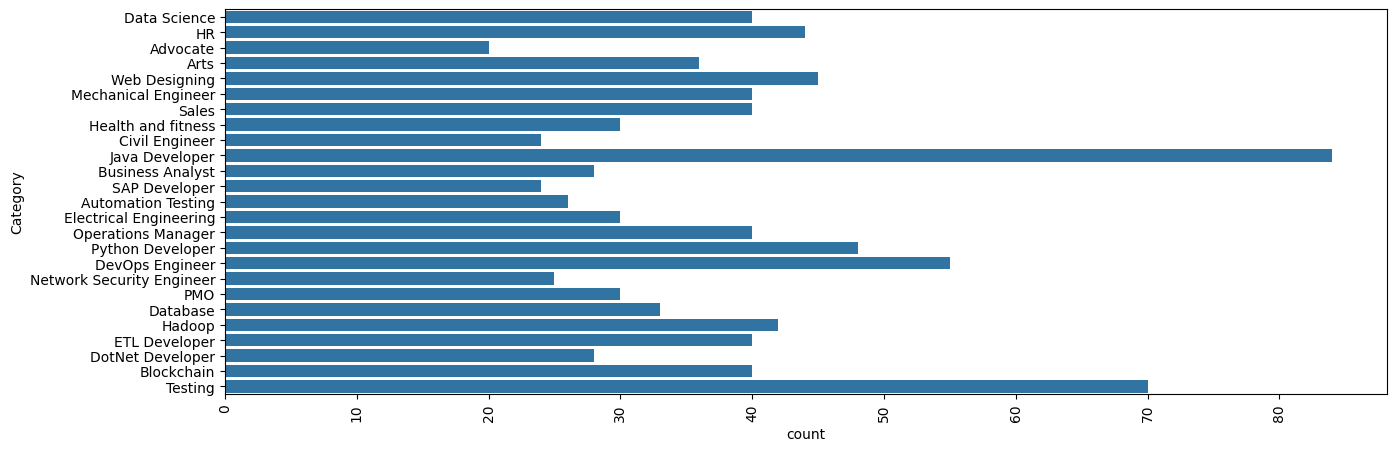

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

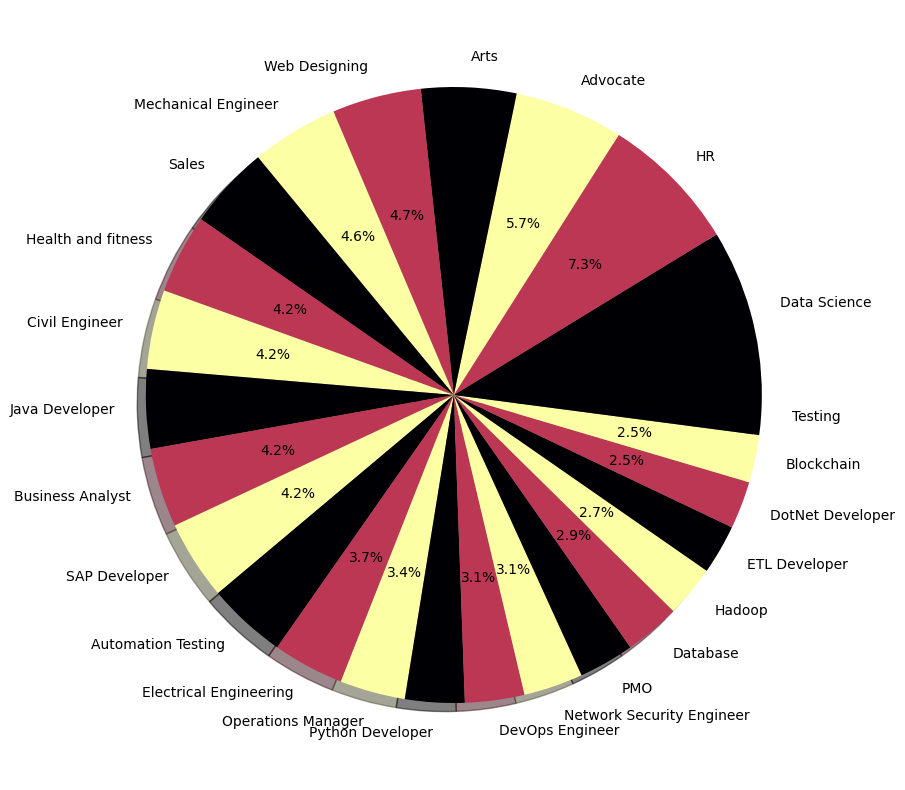

In [47]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.inferno(np.linspace(0,1,3)))
plt.show()

In [48]:
df['Category'][0]

'Data Science'

In [49]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Data Preprocessing

In [50]:
#original category distribution
print(df['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


In [51]:
# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

C:\Users\yaray\AppData\Local\Temp\ipykernel_16984\1740014957.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [52]:
#new balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Category
SAP Developer                84
Database                     84
Web Designing                84
DevOps Engineer              84
Business Analyst             84
HR                           84
PMO                          84
Data Science                 84
Hadoop                       84
Sales                        84
Mechanical Engineer          84
Network Security Engineer    84
Operations Manager           84
Electrical Engineering       84
Automation Testing           84
Health and fitness           84
Civil Engineer               84
ETL Developer                84
Testing                      84
DotNet Developer             84
Python Developer             84
Blockchain                   84
Advocate                     84
Java Developer               84
Arts                         84
Name: count, dtype: int64


In [53]:
import re

In [54]:
def cleanResume(txt):
    # remove urls
    cleanText = re.sub(r'http\S+', ' ', txt)
    # remove emails
    cleanText = re.sub(r'\S+@\S+', ' ', cleanText)
    # fix encoding issues like NaÃ¯ve -> Naive
    cleanText = cleanText.encode("ascii", "ignore").decode()
    # remove most symbols BUT keep : and - (they help structure resumes)
    cleanText = re.sub(r'[{}]'.format(re.escape("!\"#$%\'()*+,/<=>?@[\\]^_`{|}~")), ' ', cleanText)
    # normalize multiple spaces
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    return cleanText

In [55]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [56]:
df['Resume'][0]

'Skills: ETL Data Warehousing SQL PL SQL Basic Core Java Basic Python Tools: SAP BODS SAP BO Oracle 11g Sybase Education Details August 2008 to July 2012 Bachelor of Engineering Navi Mumbai Panvel Maharashtra Mumbai University June 2006 to May 2007 B.E Computer Engineering Navi Mumbai Maharashtra Ryan International School SAP BO BODS Developer Administrator Tata Consultancy Services Limited SAP BP BODS Developer Administrator Tata Consultancy - SAP BODS Skill Details DATA WAREHOUSING- Exprience - 6 months SAP BO ADMIN- Exprience - Less than 1 year months SAP BODS- Exprience - Less than 1 year months ETL- Exprience - Less than 1 year months BASIC CORE JAVA- Exprience - Less than 1 year months SAP BO- Exprience - Less than 1 year months SAP BODS ADMIN- Exprience - Less than 1 year months BASIC PYTHON- Exprience - Less than 1 year monthsCompany Details company - SAP BODS description - Client: Royal Bank of Canada Developed BODS jobs and created modified packages during migration from Syba

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [59]:
df.Category.unique()

array([21,  7, 24,  8,  4, 12, 19,  6, 13, 22, 16, 17, 18, 11,  2, 14,  5,
       10, 23,  9, 20,  3,  0, 15,  1])

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [61]:
# Convert resumes into numerical features using TF-IDF
# (fit learns the vocabulary, transform converts text to vectors)
tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## ML

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [64]:
X_train.shape

(1680, 7360)

In [65]:
X_test.shape

(420, 7360)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [67]:
# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [68]:
# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [69]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

Accuracy: 0.9857


In [70]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")

Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 13  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0

In [71]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      0.68      0.81        19
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        11
          11       0.70      1.00      0.82        14
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        14
    

In [72]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [73]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")

Accuracy: 1.0000


In [74]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")

Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0

In [75]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        14
    

Conclusion: While KNN gave reasonable results, the SVC model clearly outperformed it, 
achieving ~99.8% accuracy with near-perfect metrics. 
This shows that SVC is more suitable than KNN for handling high-dimensional 
text data like resumes.

In [76]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

print("Pickle files saved successfully!")

Pickle files saved successfully!


## Prediction System

In [77]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [78]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'